<a href="https://colab.research.google.com/github/meeshu/disruptions/blob/main/Small_multiples_disruptionsbygoalcategories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
# @title
!pwd

/content


In [3]:
# @title
##from google.colab import drive
#drive.mount('/content/drive')

### **data cleaning**

In [4]:
# @title
#importing data from github. switched from google drive.
url= 'https://raw.githubusercontent.com/meeshu/disruptions/refs/heads/main/data/Survey%20data%20-%20all-participants-coding-alpha.csv?token=GHSAT0AAAAAACZECXI3LI4LRDYYLIFDZYWMZYRUE6A' # Changed url to raw data url
df=pd.read_csv(url)
df.head()

,pid,old-pid,gid,unique gid,goaldisrupted,old-cid,goal-statement,Goal categories,Unnamed: 8,cid,...,Disruption labor produced.2,affect-goal,change,Goal changes,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,S01,S01,goal1,S01goal1,"S01goal2, S01goal4",circ1,Financial independence,Financial Stability/Safety,NaN,circ1,...,NaN,I live far away from opportunities/ There are ...,I have shifted to trying to find work online,Changed strategy,NaN,NaN,NaN,NaN,NaN,NaN
1,S01,S01,goal1,S01goal1,NaN,circ2,Financial independence,Financial Stability/Safety,NaN,circ2,...,NaN,I feel things are hopeless,"If I were more motivated, I could be more fina...",Abandoned,NaN,NaN,NaN,NaN,NaN,NaN
2,S01,S01,goal1,S01goal1,NaN,circ3,Financial independence,Financial Stability/Safety,NaN,circ3,...,NaN,I cannot stand or walk much,"I have to work more from home, but my level of...",Changed strategy,NaN,NaN,NaN,NaN,NaN,NaN
3,S01,S01,goal2,S01goal2,NaN,circ1,Quell fears,Mental health and wellbeing,NaN,circ1,...,NaN,I am fearful of the enemy (his father),I made an appt with a dr despite wanting to ha...,Changed strategy,NaN,NaN,NaN,NaN,NaN,NaN
4,S01,S01,goal2,S01goal2,NaN,circ2,Quell fears,Mental health and wellbeing,NaN,circ2,...,NaN,Fearful I won't be able to sell home if I tried,I have to trust the universe/God,No change,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# @title
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.columns = df.columns.str.rstrip()
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()
df = df.drop(columns=['old-pid'])
df = df.drop(columns=['old-cid'])
df['disruption_labor_aggregated'] = df[['disruption_labor_produced',
                                                          'disruption_labor_produced.1',
                                                          'disruption_labor_produced.2']].apply(
    lambda row: ', '.join(row.dropna().astype(str)), axis=1)


In [6]:
# @title
df['pid*gid'] = df['pid'] + "*" + df['gid']

In [7]:
# @title
df['how-long'] = df['how-long'].apply(
    lambda x: "No disruption" if isinstance(x, str) and "no disruption" in x else x
)
df['disruption_status'] = df.apply(
    lambda x: 'No Disruption' if (x['situation_that_occurred'] == "No disruption") or
    (x['disruption_labor_aggregated'] in ["No labor- positive disruption"]) or (x['how-long'] in ["No disruption"]) else 'Disruption', axis=1)

# df = df.replace('No response', np.nan)

### **#repeating disruptions for another goal**

In [8]:
a = df['rep-id'].nunique()
print("unique disruptions repeating for another goal:", a)

len(df)

repeatingdf = df[df['rep-id'].notna()]
unique_disruptions = (len(df) - len(repeatingdf)) + a
print("non-unique disruptions repeating for another goal:", len(repeatingdf))
print("total unique disruptions are:", unique_disruptions)

unique disruptions repeating for another goal: 38
non-unique disruptions repeating for another goal: 83
total unique disruptions are: 717


### **#goals for each goal type**

**How many goals were reported under each type of goal category?**

* goal categories with count of goals- per participant per goal statement (Number of goals (gid) under each goal category)
  * **DONE** - Table
  * **DONE** - Bar chart   
* **YES** - unique Identifier for each goal: gid*pid
* **TRUE** - Validation- sum of all goals should be 433


In [9]:
# @title
# Number of goals (gid) under each goal category

# Identifier: gid*pid

df_goalcategories = df[['pid', 'gid', 'pid*gid', 'goal-statement', 'goal_categories', 'goal_scope']]

goals_each_category = df_goalcategories.drop_duplicates(subset = 'pid*gid')

pivot_table = goals_each_category.pivot_table(index='goal_categories', aggfunc='size', fill_value=0)

goals_each_category = pivot_table.reset_index()

goals_each_category.rename(columns={0: 'count of goals'}, inplace=True)

goals_each_category.sort_values(by='count of goals', ascending=False, inplace=True)

goals_each_category_graph = goals_each_category

# Calculate the total count
total_count = goals_each_category['count of goals'].sum()

# Create a new DataFrame for the total row
total_row = pd.DataFrame({'goal_categories': ['Total'], 'count of goals': [total_count]})

# Concatenate the original DataFrame and the total row
goals_each_category = pd.concat([goals_each_category, total_row], ignore_index=True)

In [10]:
# @title
goals_each_category

,goal_categories,count of goals
0,Mental health and wellbeing,63
1,Physical Activity,58
2,Financial Stability/Safety,52
3,Nutrition,38
4,Weight management,38
5,Work/Career,35
6,Social connection,31
7,Other,25
8,Recreation/Shopping,25
9,Health - other,24


same as above but combining some goal categories

In [11]:
# @title
# Number of goals (gid) under each goal category

# Identifier: gid*pid

df_goalcategories = df[['pid', 'gid', 'pid*gid', 'goal-statement', 'goal_categories', 'goal_scope']]

df_goalcategories['goal_categories'] = df_goalcategories['goal_categories'].replace({
    'Manage chronic condition': 'Health - other',
    'Sleep': 'Health - other',
    'Education/Learning': 'Work/Education',
    'Work/Career': 'Work/Education'
})

goals_each_category = df_goalcategories.drop_duplicates(subset = 'pid*gid')

pivot_table = goals_each_category.pivot_table(index='goal_categories', aggfunc='size', fill_value=0)

goals_each_category = pivot_table.reset_index()

goals_each_category.rename(columns={0: 'count of goals'}, inplace=True)

goals_each_category.sort_values(by='count of goals', ascending=False, inplace=True)

goals_each_category_graph = goals_each_category

# Calculate the total count
total_count = goals_each_category['count of goals'].sum()

# Create a new DataFrame for the total row
total_row = pd.DataFrame({'goal_categories': ['Total'], 'count of goals': [total_count]})

# Concatenate the original DataFrame and the total row
goals_each_category = pd.concat([goals_each_category, total_row], ignore_index=True)

goals_each_category

<ipython-input-11-9d78f945de62>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_goalcategories['goal_categories'] = df_goalcategories['goal_categories'].replace({


,goal_categories,count of goals
0,Mental health and wellbeing,63
1,Physical Activity,58
2,Financial Stability/Safety,52
3,Work/Education,52
4,Nutrition,38
5,Weight management,38
6,Health - other,33
7,Social connection,31
8,Other,25
9,Recreation/Shopping,25


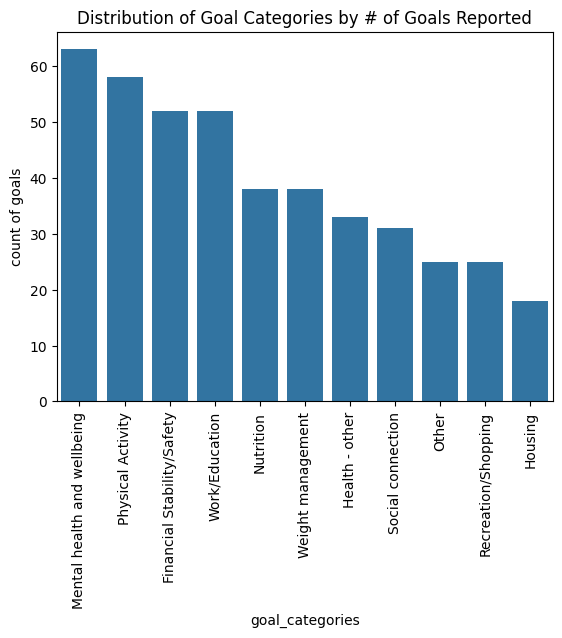

In [12]:
# @title
sns.barplot(x='goal_categories', y='count of goals', data=goals_each_category_graph)
plt.title('Distribution of Goal Categories by # of Goals Reported')
plt.xticks(rotation=90)


plt.show()

# breakdown of disruptions reported for each goal category


## number of disruptions of different durations for each goal category

filter out rows with
disruption = “no disruption”

OR "how-long" = no-disruption

include rows with disruption labor = no response because it is still a disruption